# Introduction

When looking at the data, I thought that it was interesting that there was ramen from Latin American Countries. Normally when I think of ramen I don’t think about Mexico or Colombia. I thought it would be interesting to compare different latin countries. I thought that it would be interesting to compare the different Latin American countries and to see what style of ramen people prefer based on how many stars on average the ramen was given.

# Importing 
 
I first begin by importing all the different variables that I would need throughout the project.

In [1]:
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import matplotlib

# Bringing in the info

After importing everything needed, I have to bring in the data that I will be using, ie the ramen data. 

In [2]:
with open('data/ramen-ratings.csv','r', encoding = 'utf-8') as datafile:
    ramen_ratings = csv.DictReader(datafile)
    data_list = []
    
    for row in ramen_ratings:
        data_list.append(row)

In [3]:
data_list[0]

{'Review #': '2580',
 'Brand': 'New Touch',
 'Variety': "T's Restaurant Tantanmen ",
 'Style': 'Cup',
 'Country': 'Japan',
 'Stars': '3.75',
 'Top Ten': ''}

# Format the data before generating the visualization

After bringing in the data I parsed it and pulled out the specific information that I will need. I first began by selecting Latin American countries and I then selected specific types of ramen style. I had to create a function where I called on a specific item from the data list and then I had to also make the function look for different styles that were from that specific country. I had to do that for every country that I was going to use. I also had to find the average of the star ratings for the different styles of ramen for each country. To contain the averages of the ramen I created different lists that would contain the results. Then to plot the data I would have to group together the styles based on the style and I also had to round the data so that the numbers wouldn't be too long.

In [4]:
mexcup = []
mexpack = []
bracup = []
brapack =[]
colcup = []
colpack= []
for item in data_list:
    if item['Country'] == 'Mexico':
        if item['Style'] == 'Cup':
            mexcup.append(float(item['Stars'])) 
        elif item['Style'] == 'Pack':
            mexpack.append(float(item['Stars'])) 
    elif item['Country'] == 'Brazil':
        if item['Style'] == 'Cup':
            bracup.append(float(item['Stars'])) 
        elif item['Style'] == 'Pack':
            brapack.append(float(item['Stars'])) 
    elif item['Country'] == 'Colombia':
        if item['Style'] == 'Cup':
            colcup.append(float(item['Stars'])) 
        elif item['Style'] == 'Pack':
            colpack.append(float(item['Stars'])) 
        
        
cup_average = [statistics.mean(mexcup),
               statistics.mean(bracup),
               statistics.mean(colcup),
              ]
cup_average = [round(x, 2) for x in cup_average]
pack_average = [statistics.mean(mexpack),
                statistics.mean(brapack),
                statistics.mean(colpack),
               ]
pack_average = [round(x, 2) for x in pack_average]

# Create the Visualization

Since the data is parsed, I used matplotlib to create the graph that will contain that data. I had to create a bar graph that had to separate bars for each country and that displayed the average star rating for the styles chosen.

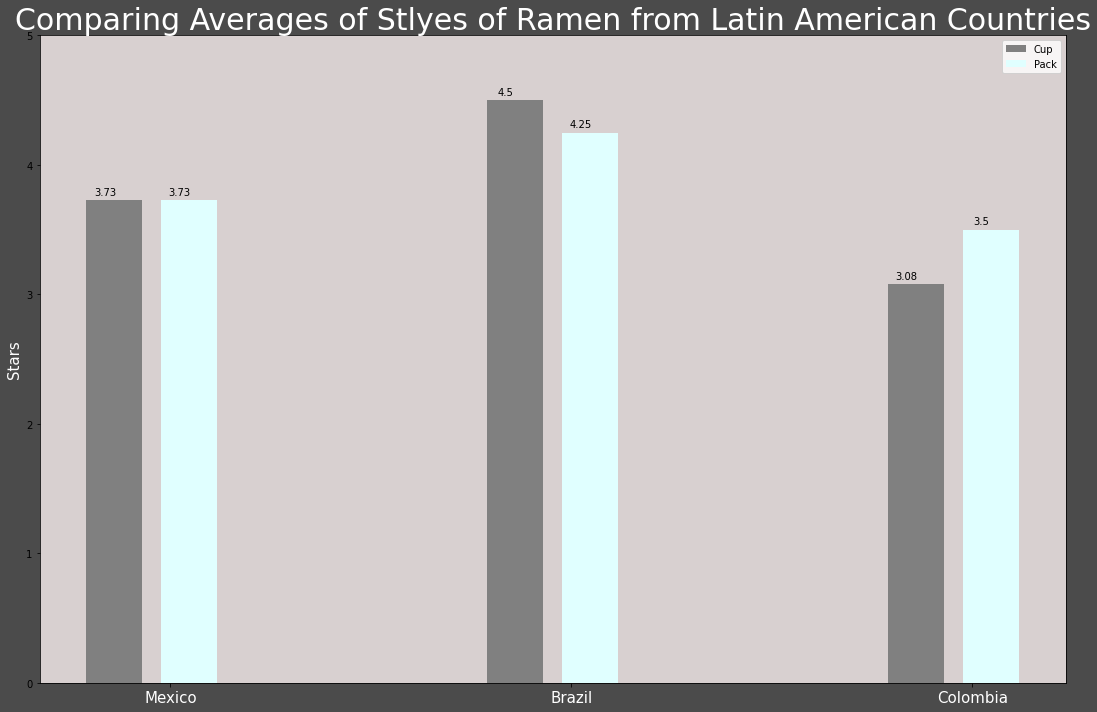

In [6]:
# These are the labels for the graph
labels = ['Mexico', 'Brazil','Colombia']

x = np.arange(len(labels))  # the label locations
width = 0.14  # the width of the bars


#In this section the bars are given labels and are customized
fig, ax = plt.subplots(figsize=(15, 10),facecolor=("#4b4b4b"))
rects1 = ax.bar(x - width/1,cup_average, width, label='Cup',color='grey')
rects2 = ax.bar(x + width/3, pack_average, width, label='Pack',color='lightcyan')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Stars', color='1',fontsize=15)
ax.set_title('Comparing Averages of Stlyes of Ramen from Latin American Countries', fontsize=30, color='1')
ax.set_xticks(x)
ax.set_xticklabels(labels, color='1',fontsize=15)
ax.set_facecolor('#d8d0d0')
ax.legend()



# Places the values of the bars 
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


fig.tight_layout()
plt.ylim([0, 5])
plt.show()

# Synopsis

After charting the data in the bar graph, one can see that those who reviewed the two different ramen styles gave higher ratings to ramen from Brazil. The chart also reveals that the ramen from Colombia received on average less stars than the ramen from the other two countries. 